In [1]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [3]:
import os, time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras import models
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [4]:
PATH = '/content/archive/Train'
TESTPATH = '/content/archive/Test'
image_width = 64
image_height = 64
batch_size = 32
image_shape=(64,64,2)
classes = os.listdir(PATH)
print(classes)

['HeadCT', 'ChestCT', 'CXR', 'Hand', 'BreastMRI', 'AbdomenCT']


In [5]:
TRAIN_DATA = ImageDataGenerator(rescale = 1./255, validation_split=0.1)
TEST_DATA = ImageDataGenerator(rescale = 1./255)
train_data= TRAIN_DATA.flow_from_directory(PATH,target_size=(image_width,image_height),batch_size=batch_size, subset='training')
validation_data= TRAIN_DATA.flow_from_directory(PATH,target_size=(image_width,image_height),batch_size=batch_size, subset='validation')
test_data = TEST_DATA.flow_from_directory(TESTPATH,target_size=(image_width,image_height),batch_size=batch_size, shuffle=False)

Found 43200 images belonging to 6 classes.
Found 4800 images belonging to 6 classes.
Found 12000 images belonging to 6 classes.


In [6]:

model = keras.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding="same", activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64, (3,3), strides=(2,2), padding="same", activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64, (3,3), strides=(2,2), padding="same", activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))


model.compile(
             optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

actualmodel = model.fit_generator(train_data, epochs=5, validation_data=validation_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1350/1350 [==============================] - 60s 44ms/step - loss: 0.0973 - accuracy: 0.9677 - val_loss: 0.0175 - val_accuracy: 0.9958
Epoch 2/5
1350/1350 [==============================] - 59s 44ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0181 - val_accuracy: 0.9956
Epoch 3/5
1350/1350 [==============================] - 60s 45ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0111 - val_accuracy: 0.9973
Epoch 4/5
1350/1350 [==============================] - 60s 44ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0101 - val_accuracy: 0.9958
Epoch 5/5
1350/1350 [==============================] - 61s 45ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0069 - val_accuracy: 0.9983


{'loss': [0.09727904945611954, 0.017019977793097496, 0.009479389525949955, 0.007684692740440369, 0.007783961016684771], 'accuracy': [0.9676851630210876, 0.9946759343147278, 0.9968286752700806, 0.9977315068244934, 0.9979398250579834], 'val_loss': [0.017459141090512276, 0.018093319609761238, 0.011111984960734844, 0.010143269784748554, 0.0069481427781283855], 'val_accuracy': [0.9958333373069763, 0.9956250190734863, 0.9972916841506958, 0.9958333373069763, 0.9983333349227905]}


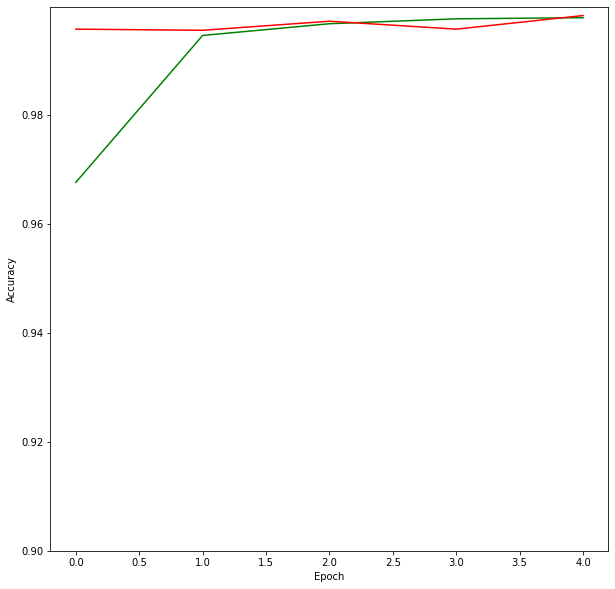

In [9]:
print(actualmodel.history)
plt.figure(figsize=(10,10))
plt.plot(actualmodel.history['accuracy'], label='accuracy', color='green')
plt.plot(actualmodel.history['val_accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(.90, 1, step=0.02))
plt.show()

In [10]:

filenames = test_data.filenames
nb_samples = len(filenames)
evaluation = model.evaluate_generator(test_data)
print(model.metrics_names)
print("Accuracy : ")
print(evaluation[1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


['loss', 'accuracy']
Accuracy : 
0.9982500076293945


In [11]:
print(test_data.classes)
pred = model.predict_generator(test_data)
y_pred = np.argmax(pred, axis=1)
print(y_pred)

[0 0 0 ... 5 5 5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


[0 0 0 ... 5 5 5]


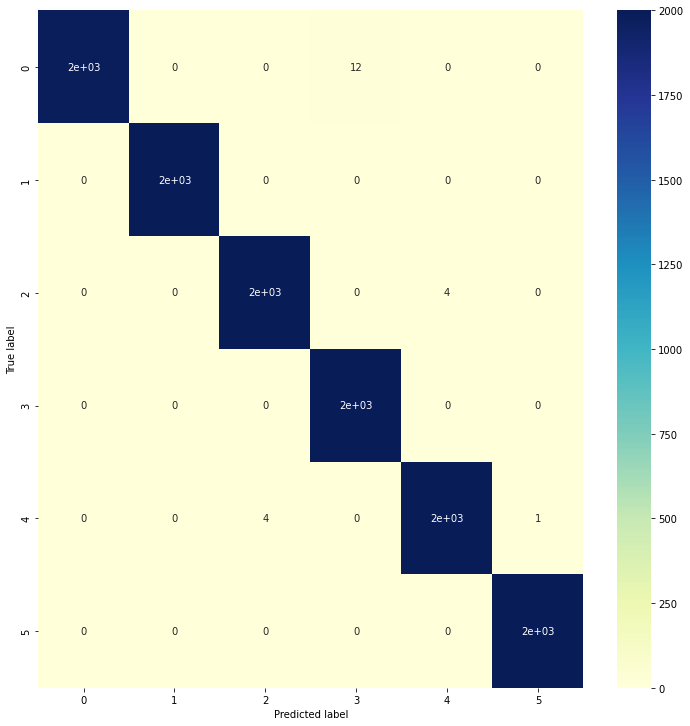

In [12]:
import seaborn as sns
con_mat = tf.math.confusion_matrix(labels=test_data.classes, predictions=y_pred).numpy()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True,cmap="YlGnBu")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()